# House Prices Prediction

## Advanced Regression Project

## 1 Introduction 

The goal of this project is to **find the best fitting model for predicting the house prices of the city of Ames**, using advanced regressions techniques, such as random forest or gradient boosting.

To do this, we will use a data set composed of 2930 observations and 80 variables (23 nominal, 23 ordinal, 14 discrete and 20 continous), which describes the sale of individual residential property in Ames from 2006 to 2010. The data has been provided by the Ames City Assesor's Office.

## 2 Data Preprocessing 

### 2.1 Importing the required packages 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 2.2 Loading the dataset 

In [2]:
#loading the training set
train = pd.read_csv('train.csv')
train.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
#check the type of data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
#loading the test set
test = pd.read_csv('test.csv')
test.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [5]:
#check the type of data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [6]:
#check the shape of both datasets
train.shape, test.shape

#The test set has a minus variable (SalePrice), as it is the one we want to predict

((1460, 81), (1459, 80))

In [7]:
#Get the Independent and Dependent variables
X_train = train.iloc[:, :-1] #all lines, all columns except the last one
y_train = train.iloc[:, 80] #all lines, only the last column

In [8]:
#check the shaape of X_train and y_train
X_train.shape, y_train.shape

((1460, 80), (1460,))

### 2.3 Missing Data 

#### 2.3.1 Missing data Analysis - Training set

##### 2.3.1.1 Check NaN/Null Values

In [9]:
#check the name of all the columns in X_train
#convert the results in a list due to the big amount of columns
list(X_train.columns)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [10]:
#check how many null values there in X_train
X_train.isnull().sum().sum()

6965

In [11]:
#check how many null values there in y_train
y_train.isnull().sum().sum()

0

In [12]:
#check the columns where we have null values
#convert the results in a list due to the big amount of columns
list(X_train.isnull().sum())

#merge columns and null values
import numpy as np
list_train = np.c_[list(X_train.columns),list(X_train.isnull().sum())]
print(list_train)

[['Id' '0']
 ['MSSubClass' '0']
 ['MSZoning' '0']
 ['LotFrontage' '259']
 ['LotArea' '0']
 ['Street' '0']
 ['Alley' '1369']
 ['LotShape' '0']
 ['LandContour' '0']
 ['Utilities' '0']
 ['LotConfig' '0']
 ['LandSlope' '0']
 ['Neighborhood' '0']
 ['Condition1' '0']
 ['Condition2' '0']
 ['BldgType' '0']
 ['HouseStyle' '0']
 ['OverallQual' '0']
 ['OverallCond' '0']
 ['YearBuilt' '0']
 ['YearRemodAdd' '0']
 ['RoofStyle' '0']
 ['RoofMatl' '0']
 ['Exterior1st' '0']
 ['Exterior2nd' '0']
 ['MasVnrType' '8']
 ['MasVnrArea' '8']
 ['ExterQual' '0']
 ['ExterCond' '0']
 ['Foundation' '0']
 ['BsmtQual' '37']
 ['BsmtCond' '37']
 ['BsmtExposure' '38']
 ['BsmtFinType1' '37']
 ['BsmtFinSF1' '0']
 ['BsmtFinType2' '38']
 ['BsmtFinSF2' '0']
 ['BsmtUnfSF' '0']
 ['TotalBsmtSF' '0']
 ['Heating' '0']
 ['HeatingQC' '0']
 ['CentralAir' '0']
 ['Electrical' '1']
 ['1stFlrSF' '0']
 ['2ndFlrSF' '0']
 ['LowQualFinSF' '0']
 ['GrLivArea' '0']
 ['BsmtFullBath' '0']
 ['BsmtHalfBath' '0']
 ['FullBath' '0']
 ['HalfBath' '0']


##### 2.3.1.2 Remove NaN/Null values in numerical variables  

In [13]:
#remove the MiscFeature, Fence, PoolQC and Alley variables
#less than 20% of records are not null values
X_train.drop(['MiscFeature', 'Fence', 'PoolQC', 'Alley'], axis = 1, inplace = True)

In [14]:
#check the shape of the training set after removing the variables 
X_train.shape

(1460, 76)

In [15]:
#compute the median of the numerical variables with na/null values
median_LotFrontage = X_train['LotFrontage'].median(skipna = True)
median_MasVnrArea = X_train['MasVnrArea'].median(skipna = True)
median_GarageYrBlt = X_train['GarageYrBlt'].median(skipna = True) 

In [16]:
print(median_LotFrontage, median_MasVnrArea , median_GarageYrBlt)

69.0 0.0 1980.0


In [17]:
X_train['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [18]:
#compute the mean for the MasVnrArea variable
mean_MasVnrArea = X_train['MasVnrArea'].mean(skipna = True)
print(mean_MasVnrArea)

103.68526170798899


In [19]:
#replace the na/nan values by the respective median/mean
X_train['LotFrontage'] = X_train['LotFrontage'].replace(np.NaN, median_LotFrontage)
X_train['MasVnrArea'] = X_train['MasVnrArea'].replace(np.NaN, mean_MasVnrArea)
X_train['GarageYrBlt'] = X_train['GarageYrBlt'].replace(np.NaN, median_GarageYrBlt)

In [20]:
#check null values in the LotFrontage, MasVnrArea and GarageYrBlt variables
X_train['LotFrontage'].isnull().sum().sum()
X_train['MasVnrArea'].isnull().sum().sum()
X_train['GarageYrBlt'].isnull().sum().sum()

0

#### 2.3.2 Missing data Analysis - Test set 

##### 2.3.2.1 Check NaN/Null Values 

In [27]:
#check the name of all the columns in test
#convert the results in a list due to the big amount of columns
list(test.columns)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [28]:
#check how many null values there in test
test.isnull().sum().sum()

7000

In [29]:
#check the columns where we have null values
#convert the results in a list due to the big amount of columns
list(test.isnull().sum())

#merge columns and null values
import numpy as np
list_test = np.c_[list(test.columns),list(test.isnull().sum())]
print(list_test)

[['Id' '0']
 ['MSSubClass' '0']
 ['MSZoning' '4']
 ['LotFrontage' '227']
 ['LotArea' '0']
 ['Street' '0']
 ['Alley' '1352']
 ['LotShape' '0']
 ['LandContour' '0']
 ['Utilities' '2']
 ['LotConfig' '0']
 ['LandSlope' '0']
 ['Neighborhood' '0']
 ['Condition1' '0']
 ['Condition2' '0']
 ['BldgType' '0']
 ['HouseStyle' '0']
 ['OverallQual' '0']
 ['OverallCond' '0']
 ['YearBuilt' '0']
 ['YearRemodAdd' '0']
 ['RoofStyle' '0']
 ['RoofMatl' '0']
 ['Exterior1st' '1']
 ['Exterior2nd' '1']
 ['MasVnrType' '16']
 ['MasVnrArea' '15']
 ['ExterQual' '0']
 ['ExterCond' '0']
 ['Foundation' '0']
 ['BsmtQual' '44']
 ['BsmtCond' '45']
 ['BsmtExposure' '44']
 ['BsmtFinType1' '42']
 ['BsmtFinSF1' '1']
 ['BsmtFinType2' '42']
 ['BsmtFinSF2' '1']
 ['BsmtUnfSF' '1']
 ['TotalBsmtSF' '1']
 ['Heating' '0']
 ['HeatingQC' '0']
 ['CentralAir' '0']
 ['Electrical' '0']
 ['1stFlrSF' '0']
 ['2ndFlrSF' '0']
 ['LowQualFinSF' '0']
 ['GrLivArea' '0']
 ['BsmtFullBath' '2']
 ['BsmtHalfBath' '2']
 ['FullBath' '0']
 ['HalfBath' '0'

##### 2.3.2.2 Remove NaN/Null values in numerical variables   

In [30]:
#remove the MiscFeature, Fence, PoolQC and Alley variables
#less than 20% of records are not null values
test.drop(['MiscFeature', 'Fence', 'PoolQC', 'Alley'], axis = 1, inplace = True)

In [31]:
#check the shape of the test set after removing the variables 
test.shape

(1459, 76)

In [35]:
#compute the median of the numerical variables with na/null values
median_LotFrontage = test['LotFrontage'].median(skipna = True)
median_MasVnrArea = test['MasVnrArea'].median(skipna = True)
median_BsmtFinSF1 = test['BsmtFinSF1'].median(skipna = True)
median_BsmtFinSF2 = test['BsmtFinSF2'].median(skipna = True)
median_BsmtUnfSF = test['BsmtUnfSF'].median(skipna = True)
median_TotalBsmtSF = test['TotalBsmtSF'].median(skipna = True)
median_BsmtFullBath = test['BsmtFullBath'].median(skipna = True)
median_BsmtHalfBath = test['BsmtHalfBath'].median(skipna = True)
median_GarageYrBlt = test['GarageYrBlt'].median(skipna = True)
median_GarageCars = test['GarageCars'].median(skipna = True)
median_GarageArea = test['GarageArea'].median(skipna = True)

In [36]:
print(median_LotFrontage, median_MasVnrArea , median_BsmtFinSF1, median_BsmtFinSF2, median_BsmtUnfSF)

67.0 0.0 350.5 0.0 460.0


In [37]:
print(median_TotalBsmtSF, median_BsmtFullBath, median_BsmtHalfBath, median_GarageYrBlt, median_GarageCars, median_GarageArea)

988.0 0.0 0.0 1979.0 2.0 480.0


In [38]:
test['MasVnrArea'].describe()

count    1444.000000
mean      100.709141
std       177.625900
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1290.000000
Name: MasVnrArea, dtype: float64

In [41]:
test['BsmtFinSF2'].describe()

count    1458.000000
mean       52.619342
std       176.753926
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFinSF2, dtype: float64

In [42]:
test['BsmtFullBath'].describe()

count    1457.000000
mean        0.434454
std         0.530648
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64

In [43]:
test['BsmtHalfBath'].describe()

count    1457.000000
mean        0.065202
std         0.252468
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64

In [44]:
#compute the mean for the MasVnrArea, BsmtFinSF2, BsmtFullBath and BsmtHalfBath variables
mean_MasVnrArea = test['MasVnrArea'].mean(skipna = True)
mean_BsmtFinSF2 = test['BsmtFinSF2'].mean(skipna = True)
mean_BsmtFullBath = test['BsmtFullBath'].mean(skipna = True)
mean_BsmtHalfBath = test['BsmtHalfBath'].mean(skipna = True)

In [45]:
print(mean_MasVnrArea, mean_BsmtFinSF2, mean_BsmtFullBath, mean_BsmtHalfBath)

100.70914127423822 52.61934156378601 0.4344543582704187 0.06520247083047358


In [46]:
#replace the na/nan values by the respective median/mean
test['LotFrontage'] = test['LotFrontage'].replace(np.NaN, median_LotFrontage)
test['MasVnrArea'] = test['MasVnrArea'].replace(np.NaN, mean_MasVnrArea)
test['BsmtFinSF1'] = test['BsmtFinSF1'].replace(np.NaN, median_BsmtFinSF1)
test['BsmtFinSF2'] = test['BsmtFinSF2'].replace(np.NaN, mean_BsmtFinSF2)
test['BsmtUnfSF'] = test['BsmtUnfSF'].replace(np.NaN, median_BsmtUnfSF)
test['TotalBsmtSF'] = test['TotalBsmtSF'].replace(np.NaN, median_TotalBsmtSF)
test['BsmtFullBath'] = test['BsmtFullBath'].replace(np.NaN, mean_BsmtFullBath)
test['BsmtHalfBath'] = test['BsmtHalfBath'].replace(np.NaN, mean_BsmtHalfBath)
test['GarageYrBlt'] = test['GarageYrBlt'].replace(np.NaN, median_GarageYrBlt)
test['GarageCars'] = test['GarageCars'].replace(np.NaN, median_GarageCars)
test['GarageArea'] = test['GarageArea'].replace(np.NaN, median_GarageArea)

In [47]:
#check null values in the treated variables
test['LotFrontage'].isnull().sum().sum()
test['MasVnrArea'].isnull().sum().sum()
test['BsmtFinSF1'].isnull().sum().sum()
test['BsmtFinSF2'].isnull().sum().sum()
test['BsmtUnfSF'].isnull().sum().sum()
test['TotalBsmtSF'].isnull().sum().sum()
test['BsmtFullBath'].isnull().sum().sum()
test['BsmtHalfBath'].isnull().sum().sum()
test['GarageYrBlt'].isnull().sum().sum()
test['GarageCars'].isnull().sum().sum()
test['GarageArea'].isnull().sum().sum()

0

### 2.4 Enconding Categorical Data

#### 2.4.1 Enconding categorical data - Training set

In [21]:
#There are 39 categorical variables (dtype= object) that we need to transform into dummy variables

#convert categorical data into dummy variables
X_train = pd.get_dummies(X_train, columns=['MSZoning','Street','LotShape','LandContour','Utilities',
                                           'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType',
                                           'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
                                           'ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure',
                                           'BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical',
                                           'KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual',
                                           'GarageCond','PavedDrive','SaleType','SaleCondition'])

In [22]:
#check tshe shape of X_train
X_train.shape

(1460, 276)

In [23]:
#display the X_train data
X_train.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,0,0,0,1,0,0,0,0,1,0
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,0,0,0,1,0,0,0,0,1,0
7,8,60,69.0,10382,7,6,1973,1973,240.0,859,...,0,0,0,1,0,0,0,0,1,0
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,0,0,0,1,1,0,0,0,0,0
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,0,0,1,0,0,0,0,1,0


In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 276 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(34), uint8(239)
memory usage: 762.9 KB


In [25]:
X_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,0.003425,0.083562,0.002055,0.867808,0.069178,0.002740,0.008219,0.013699,0.820548,0.085616
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,0.058440,0.276824,0.045299,0.338815,0.253844,0.052289,0.090317,0.116277,0.383862,0.279893
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
#check if the remaining null values have been removed
X_train.isnull().sum().sum()

0

#### 2.4.2 Enconding categorical data - Test set

In [48]:
#There are 39 categorical variables (dtype= object) that we need to transform into dummy variables

#convert categorical data into dummy variables
test = pd.get_dummies(test, columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope',
                                     'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',
                                     'Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual',
                                     'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir',
                                     'Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish',
                                     'GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition'])

In [49]:
#check tshe shape of test data
test.shape

(1459, 260)

In [50]:
#display the test data
test.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0
5,1466,60,75.0,10000,6,5,1993,1994,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
6,1467,20,67.0,7980,6,7,1992,2007,0.0,935.0,...,0,0,0,1,0,0,0,0,1,0
7,1468,60,63.0,8402,6,5,1998,1998,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
8,1469,20,85.0,10176,7,5,1990,1990,0.0,637.0,...,0,0,0,1,0,0,0,0,1,0
9,1470,20,70.0,8400,4,5,1970,1970,0.0,804.0,...,0,0,0,1,0,0,0,0,1,0


In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 260 entries, Id to SaleCondition_Partial
dtypes: float64(11), int64(26), uint8(223)
memory usage: 739.6 KB


In [52]:
#check if the remaining null values have been removed
test.isnull().sum().sum()

0

### 2.5 Exporting data to csv 

#### 2.5.1 Exporting the X_train data to csv 

In [56]:
#export the X_train data to csv to check the final data
route = "/Users/Lorena Mendez Otero/Documents/train_adjustmetns.csv"
X_train.to_csv(route)

#### 2.5.2 Exporting test data to csv 

In [57]:
#export the test data to csv to check the final data
route = "/Users/Lorena Mendez Otero/Documents/test_adjustmetns.csv"
test.to_csv(route)

## 3 Building the Prediction Models 

In [58]:
#check whether the dependent variable (y_train) follows a normal distribution
y_train.describe() 

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'SalePrice Histogram')

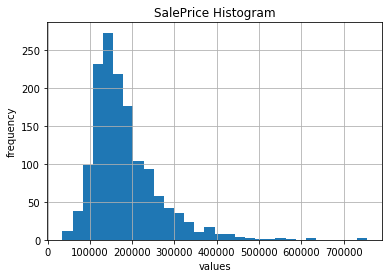

In [63]:
# histograma
y_train.hist(normed=0, histtype='stepfilled', bins=30)
plt.ylabel('frequency')
plt.xlabel('values')
plt.title('SalePrice Histogram')


Comments: We can see that the y_train variable does not follow a normal distribution (Gaussian distribution)